# 1. Preprocessing (Christina)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

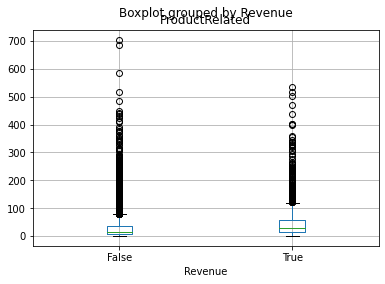

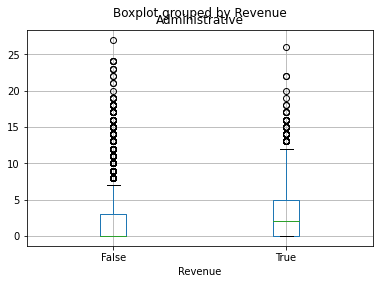

<Figure size 432x288 with 0 Axes>

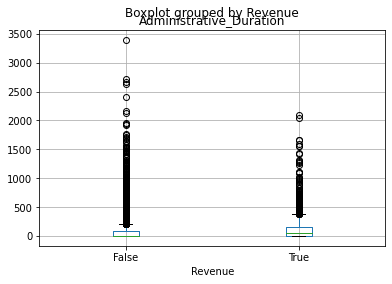

<Figure size 432x288 with 0 Axes>

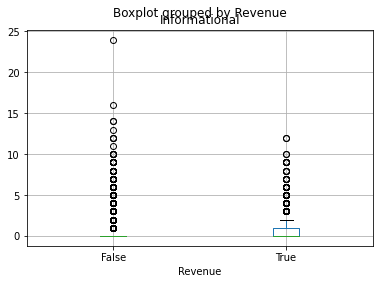

<Figure size 432x288 with 0 Axes>

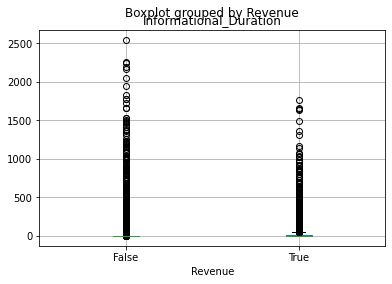

<Figure size 432x288 with 0 Axes>

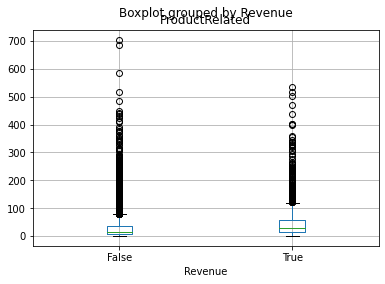

<Figure size 432x288 with 0 Axes>

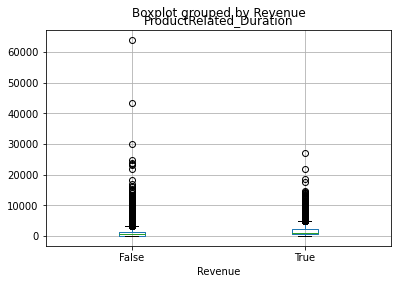

<Figure size 432x288 with 0 Axes>

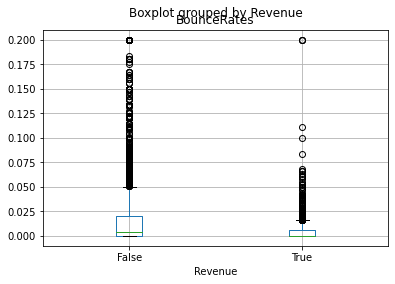

<Figure size 432x288 with 0 Axes>

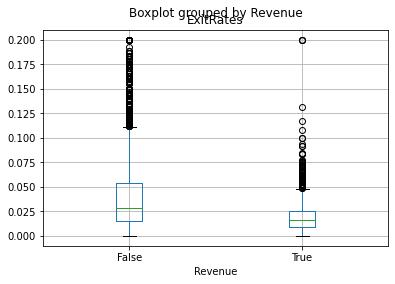

<Figure size 432x288 with 0 Axes>

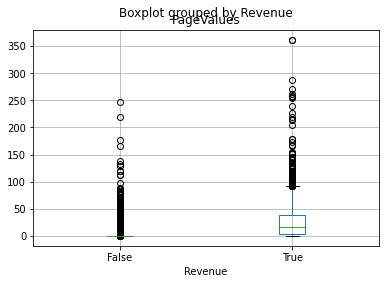

<Figure size 432x288 with 0 Axes>

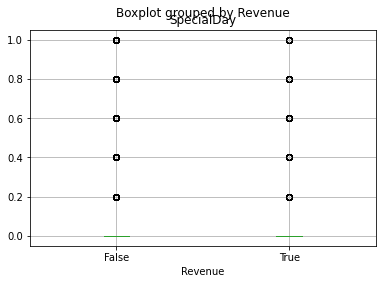

X_train : (8631, 13)
X_test : (3699, 13)
y_train : (8631,)
y_test : (3699,)
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'PageValues', 'SpecialDay', 'VisitorType_New_Visitor', 'Month_Mar',
       'Month_May', 'Month_Nov'],
      dtype='object')


<ipython-input-1-8e2d0919bd85>:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[each] = np.log1p(X_train[each])
<ipython-input-1-8e2d0919bd85>:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[each] = np.log1p(X_test[each])


<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

shopper = pd.read_csv('online_shoppers_intention.csv')
shopper.head()
shopper.info()
shopper['Revenue'].unique()
# only contains True and False
shopper.describe()

# =============================================================================
# EDA
# =============================================================================
shopper.boxplot('ProductRelated', by='Revenue')
plt.show()
shopper.columns
n_positive = shopper.loc[shopper['Revenue'] == True, 'Revenue'].count()
n_negative = shopper.loc[shopper['Revenue'] == False, 'Revenue'].count()

# =============================================================================
# Analysis of numerical variables
# =============================================================================
shopper_corr = shopper.corr()

var_list = ['Administrative', 'Administrative_Duration', 'Informational',
            'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
            'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

for var in var_list:
    shopper.boxplot(var, by='Revenue')
    plt.show()
    plt.savefig(var + '.png')

# SpecialDay is hard to tell from graph
buy_specialday = shopper.loc[shopper['Revenue'] == True, 'SpecialDay']
sum(buy_specialday == 0)
np.percentile(buy_specialday, [25, 50, 75])
left_specialday = shopper.loc[shopper['Revenue'] == False, 'SpecialDay']
np.percentile(left_specialday, [25, 50, 75])
# all 0s for these percentiles, too few values have non-zero values


# Analysis of categorical variables
# Weekend - not as helpful, 3% difference
buy_weekend_dist = shopper.loc[shopper['Weekend'] == True, 'Revenue'].value_counts()
n_purchased = shopper.loc[shopper['Weekend'] == True, 'Revenue'].count()
buy_weekend_dist / n_purchased

# =============================================================================
# False    0.826011
# True     0.173989
# Name: Revenue, dtype: float64
# =============================================================================

left_weekend_dist = shopper.loc[shopper['Weekend'] == False, 'Revenue'].value_counts()
n_left = shopper.loc[shopper['Weekend'] == False, 'Revenue'].count()
left_weekend_dist / n_left
# =============================================================================
#
# False    0.851089
# True     0.148911
# Name: Revenue, dtype: float64
# =============================================================================

# Visitor_Type - good, 10% difference
returning_visitor_dist = shopper.loc[shopper['VisitorType'] == 'Returning_Visitor', 'Revenue'].value_counts()
n_returning = shopper.loc[shopper['VisitorType'] == 'Returning_Visitor', 'Revenue'].count()
returning_visitor_dist / n_returning

# =============================================================================
# False    0.860677
# True     0.139323
# Name: Revenue, dtype: float64
# =============================================================================

new_visitor_dist = shopper.loc[shopper['VisitorType'] == 'New_Visitor', 'Revenue'].value_counts()
n_new = shopper.loc[shopper['VisitorType'] == 'New_Visitor', 'Revenue'].count()
new_visitor_dist / n_new

# =============================================================================
# False    0.750885
# True     0.249115
# Name: Revenue, dtype: float64
# =============================================================================

# Month - good, varies greatly by month
shopper['Month'].unique()
months = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Oct', 'Dec']
# =============================================================================
# for each in months:
#     shopper.loc[shopper['Month']== each, 'Revenue'].value_counts()
# =============================================================================

shopper.loc[shopper['Month'] == 'Nov', 'Revenue'].value_counts()
shopper.loc[shopper['Month'] == 'June', 'Revenue'].value_counts()

# =============================================================================
# Variables we can try dropping
# =============================================================================
# - Drop one of the ExitRates and BounceRates (Correlation>0.9)
#   ExitRates > BounceRates
# -  Drop one of the ProductRelated & ProductRelated_duration (Correlation>0.8)
# - Weekend


# =============================================================================
# Data Preprocessing
# =============================================================================

# drop the label and categrical variables we don't know
target_Y = shopper['Revenue']
feature_X = shopper.drop(columns=['Revenue', 'OperatingSystems', 'Browser', 'Region', 'TrafficType'])

# split into test set and training set
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(feature_X, target_Y, test_size=0.3,
                                                                            random_state=0, stratify=target_Y)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(Y_train.shape))
print("y_test : " + str(Y_test.shape))

# missing values
pd.isnull(X_train).sum(axis=0)
# note that there are no missing values

nums = X_train[['Administrative', 'Administrative_Duration', 'Informational',
                'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]

skewness = nums.skew(axis=0, numeric_only=True)
too_skewed = skewness[skewness>0.5].index
# our data is very right-skewed
for each in too_skewed:
    X_train[each] = np.log1p(X_train[each])
    X_test[each] = np.log1p(X_test[each])

# dummies for categorical variables
cats = ['VisitorType', 'Weekend']
X_train = pd.get_dummies(X_train, columns=cats)
X_test = pd.get_dummies(X_test, columns=cats)
X_train['Weekend'] = X_train['Weekend_True']
X_train = X_train.drop(columns=['Weekend_True', 'Weekend_False'])

X_test['Weekend'] = X_test['Weekend_True']
X_test = X_test.drop(columns=['Weekend_True', 'Weekend_False'])
X_test.align(X_train, join='left', axis=1)


def monthToNum(shortMonth):
    return {
        'Jan': 1,
        'Feb': 2,
        'Mar': 3,
        'Apr': 4,
        'May': 5,
        'June': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12
    }[shortMonth]


#X_train['Month'] = X_train['Month'].apply(lambda x: monthToNum(x))
#X_test['Month'] = X_test['Month'].apply(lambda x: monthToNum(x))

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Changing the range of data to use the Chi-Square filter method
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = pd.DataFrame(mm_scaler.transform(X_train), index=X_train.index, columns=X_train.columns)

# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=12)
selector.fit(X_train, Y_train)
# If we want to drop variables, use
# X_train_new = selector.transform(X_train)
# X_test_new = selector.transform(X_test)
print(X_train.columns[selector.get_support(indices=True)])

# Normalizing the data
import sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns,
                           index=X_train.index)

scaler.fit(X_test)
X_test_std = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns,
                          index=X_test.index)

# 2. Logistic Regression (William)
## 2.1 Build Model

In [2]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=4096)
model.fit(X_train_std, Y_train)
Y_pred = model.predict(X_test_std)

## 2.2 Evaluate Model
### 2.2.1 Conventional Metrics

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import KFold, cross_val_score

# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

# Accuracy Score
print(accuracy_score(Y_test, Y_pred))

# F1 Score
print(f1_score(Y_test, Y_pred))

# Kfold
print(cross_val_score(LogisticRegression(max_iter=4096), X_train, Y_train, cv=KFold(n_splits=5)))

[[3010  117]
 [ 255  317]]
0.8994322789943228
0.6302186878727633
[0.90040533 0.89397451 0.88528389 0.9032445  0.88991889]


### 2.2.2 Feature Ranking

In [4]:
odds = np.exp(model.coef_[0])
pd.DataFrame(odds, index=X_train_std.columns, columns=['coefficient']).sort_values(by='coefficient', key=abs, ascending=False)

,coefficient
PageValues,4.183036
Month_Nov,1.460316
ProductRelated,1.296414
VisitorType_New_Visitor,1.145044
Informational,1.121812
Weekend,1.065113
Month_Aug,1.048419
Month_Oct,1.044633
Month_Sep,1.036707
SpecialDay,1.022843


# 2. Neural Network (Evan)
## 2.1 Build Model

In [5]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='adam', hidden_layer_sizes=(6, 3), activation='relu', alpha=0.0001, max_iter=1000)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

## 2.2 Evaluate Model

In [6]:
accuracy_score(Y_test, y_pred)

0.9018653690186537

## 2.3 Feature importance
The concept is really straightforward: We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature. A feature is “important” if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. A feature is “unimportant” if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction.
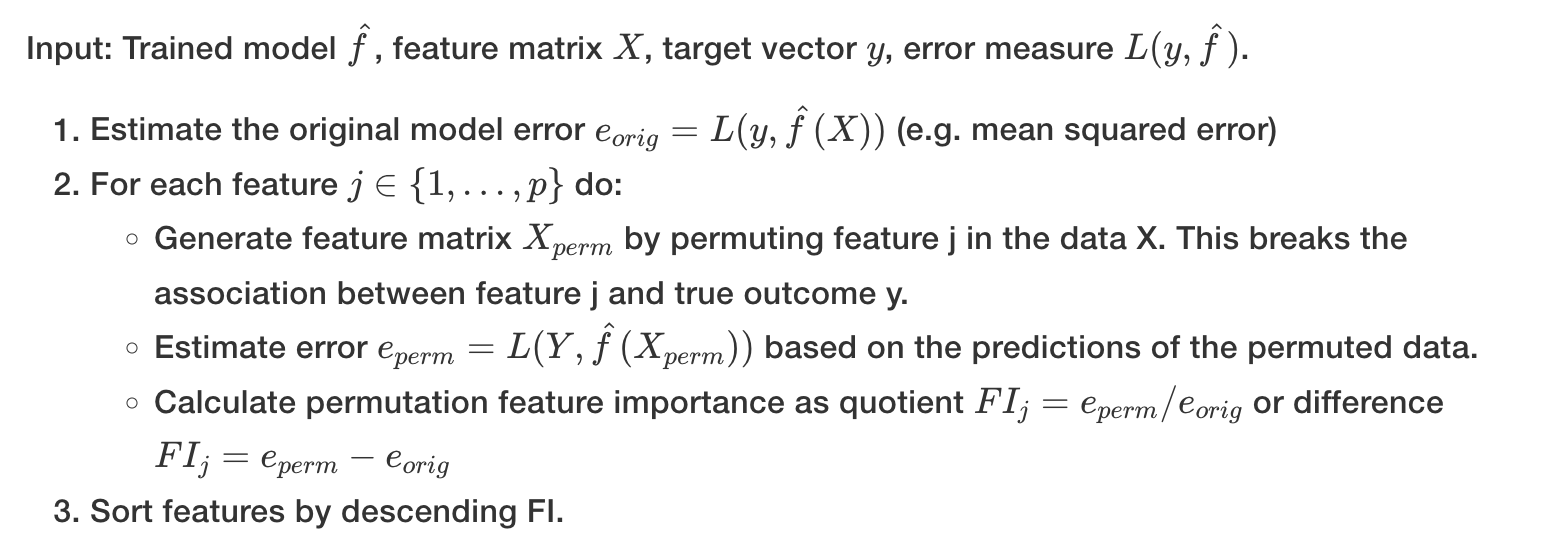

Reference: https://christophm.github.io/interpretable-ml-book/feature-importance.html

### 2.3.1 Compute Original Error

In [7]:
from sklearn.metrics import mean_squared_error

Y_train =Y_train.map({ True: 1 , False :0})
Y_test =Y_test.map({ True: 1 , False :0})

original_error = mean_squared_error(Y_test, y_pred)
original_error

0.09813463098134631

### 2.3.2 Compute Error for each feature

In [8]:
# initialize features error
features_error = pd.DataFrame(np.zeros((1,24), dtype=np.float64), columns=X_train.columns)

total_error = 0

for feature in X_train.columns:
    for i in range(10):
        X_train_copy = X_train.copy()
        X_train_copy[feature] = np.random.permutation(X_train_copy[feature])

        model.fit(X_train_copy, Y_train)
        y_pred = model.predict(X_test)
    
        total_error += mean_squared_error(Y_test, y_pred)
    
    features_error[feature] = total_error/10
    total_error = 0
    
features_error

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0.104758,0.107921,0.103055,0.108759,0.10392,0.103569,0.103082,0.104785,0.157772,0.104839,...,0.102812,0.108489,0.101865,0.104325,0.103433,0.103109,0.104542,0.10984,0.104055,0.103163


In [12]:
features_error = pd.DataFrame(features_error.values.T, index=features_error.columns).sort_values([0], ascending=False)

In [21]:
features_error = (features_error - original_error) / original_error

In [22]:
features_error

,0
PageValues,0.607713
Month_Nov,0.119284
Informational_Duration,0.108264
Month_Dec,0.105510
Administrative_Duration,0.099725
SpecialDay,0.068320
ExitRates,0.067769
Administrative,0.067493
Month_May,0.065289
Month_Jul,0.063085


# 3. K-Nearest Neighbors (Jerry)
## 3.1 Build Model

## 3.2 Evaluate Model